In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.datasets import fetch_openml


In [21]:
# Step 1: Load the dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)
data = boston.data
target = boston.target
df = data.copy()
df['PRICE'] = target

In [22]:
# Save to a CSV file for reproducibility
df.to_csv("boston_housing.csv", index=False)

# Load the dataset from the saved CSV
df = pd.read_csv("boston_housing.csv")


In [23]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [24]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

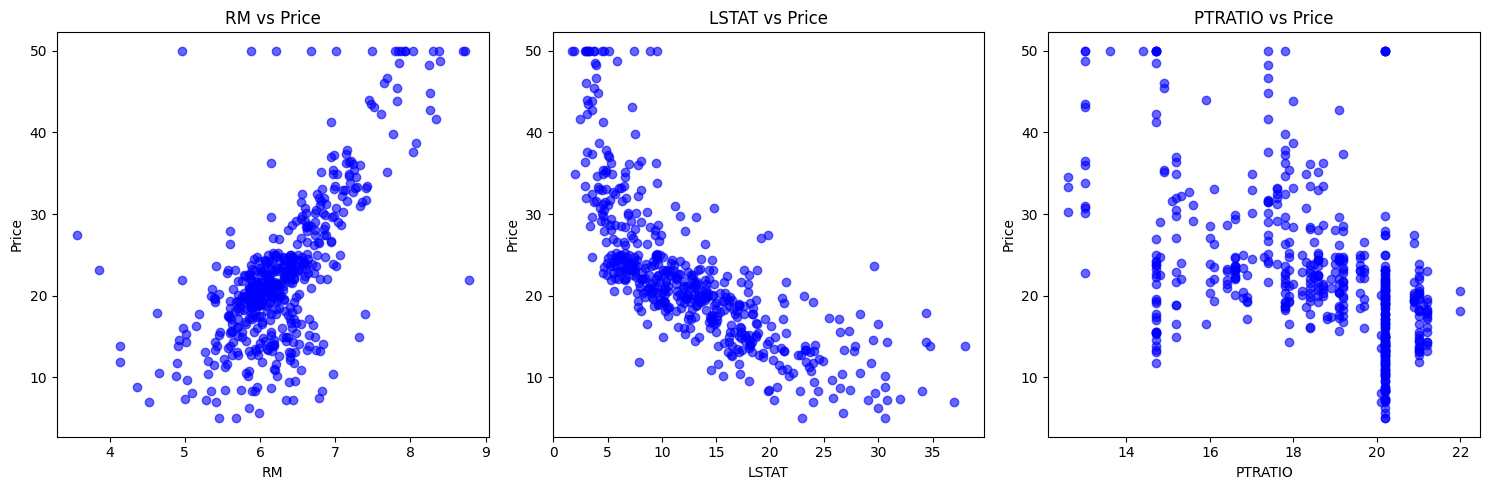

In [25]:
# Step 2: Define features and target
features = ['RM', 'LSTAT', 'PTRATIO']  # Average rooms, % lower status, pupil-teacher ratio
X = df[features]
y = df['PRICE']

# Step 3: Visualize relationships
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    plt.scatter(df[feature], y, alpha=0.6, color='b')
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(f"{feature} vs Price")
plt.tight_layout()
plt.show()


In [26]:
# Step 4: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
# Step 5: Add Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)  # Experiment with degree=2 or higher
X_poly = poly.fit_transform(X_scaled)

# Step 6: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [28]:
# Step 7: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [29]:
# Step 8: Cross-Validation
cv_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
print(f"Cross-Validation R² Scores: {cv_scores*100}")
print(f"Average Cross-Validation R² Score: {cv_scores.mean()*100:.2f}")


Cross-Validation R² Scores: [77.47788057 66.63489066 81.58964604 86.09262939 70.00099891]
Average Cross-Validation R² Score: 76.36


In [30]:
# Step 9: Predict on the test set
y_pred = model.predict(X_test)


In [31]:
# Step 10: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = model.score(X_test, y_test) * 100
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2*100:.2f}")
print(f"Model Accuracy: {accuracy:.2f}%")

Mean Squared Error: 16.29
R² Score: 77.79
Model Accuracy: 77.79%


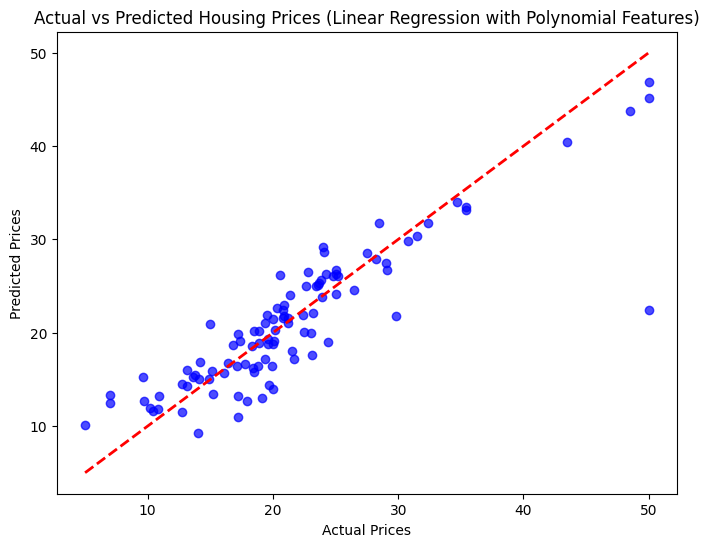

In [32]:
# Step 11: Visualize Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices (Linear Regression with Polynomial Features)")
plt.show()

         Feature  Coefficient
0             RM     2.290967
6        LSTAT^2     0.856638
3           RM^2     0.510271
8      PTRATIO^2    -0.465963
4       RM LSTAT    -0.518895
7  LSTAT PTRATIO    -1.480457
2        PTRATIO    -1.537509
5     RM PTRATIO    -1.970336
1          LSTAT    -5.283750


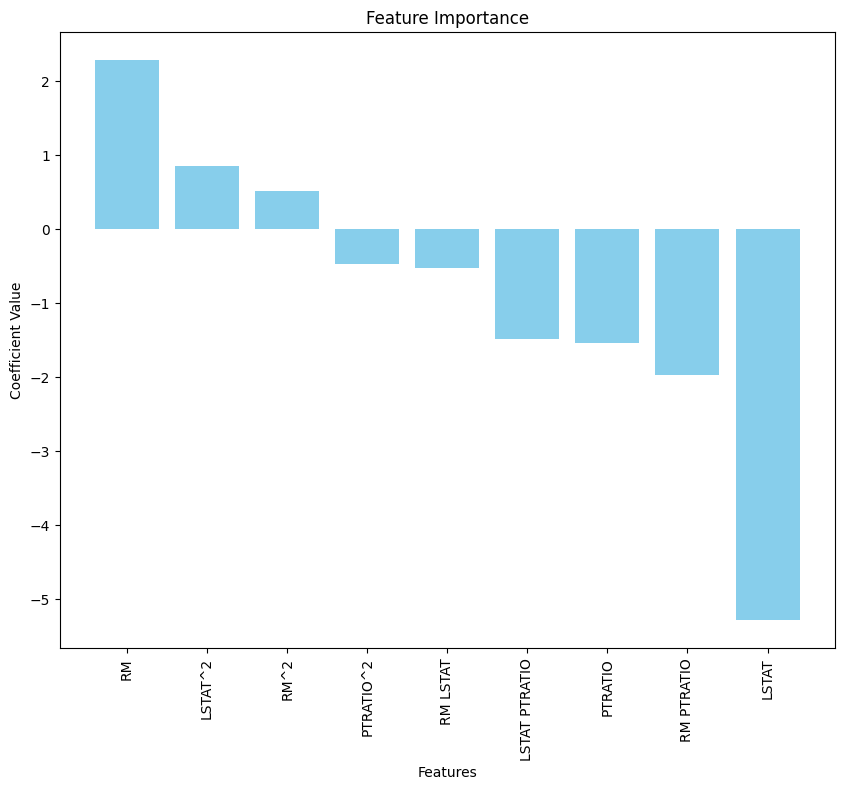

In [33]:
# Step 12: Visualize Feature Importance
coefficients = pd.DataFrame({
    'Feature': poly.get_feature_names_out(features),
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

plt.figure(figsize=(10, 8))
plt.bar(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance")
plt.show()